<a href="https://colab.research.google.com/github/alimanur/MLTSA_anurlan/blob/master/HW2/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [0]:
...
print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


#  data inspection

plot each time series (ts)

i

(447, 10)

/Users/fbb/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


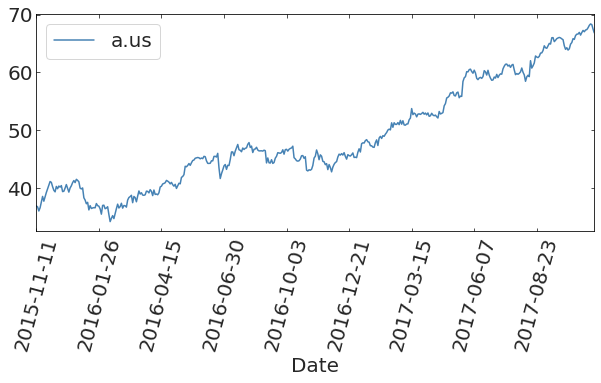

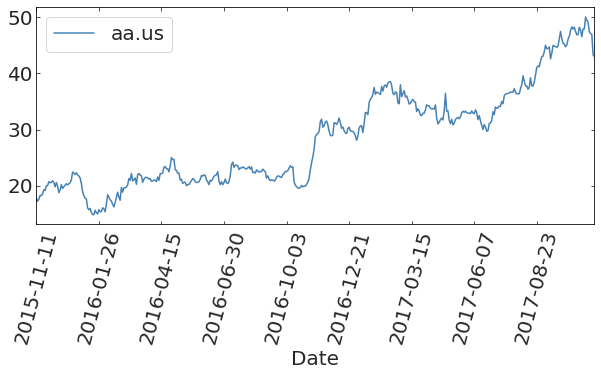

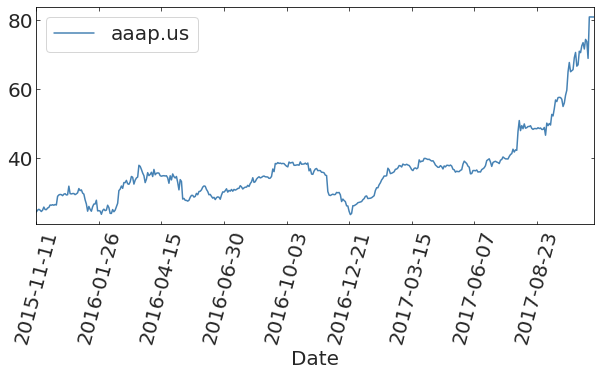

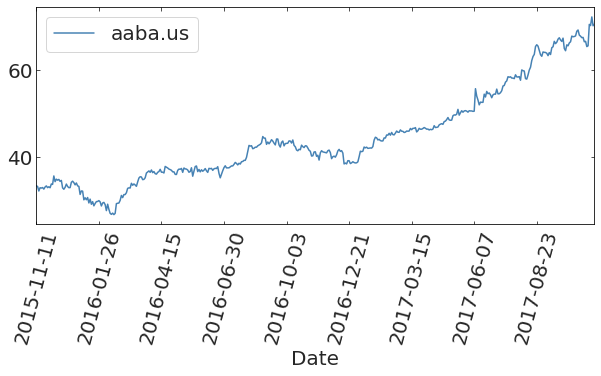

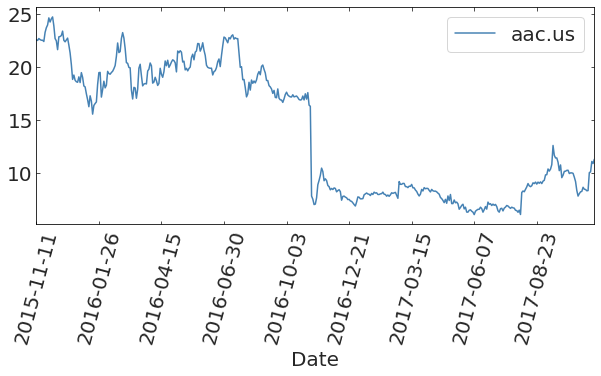

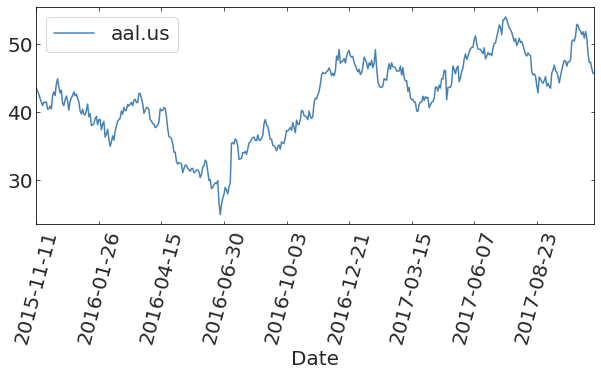

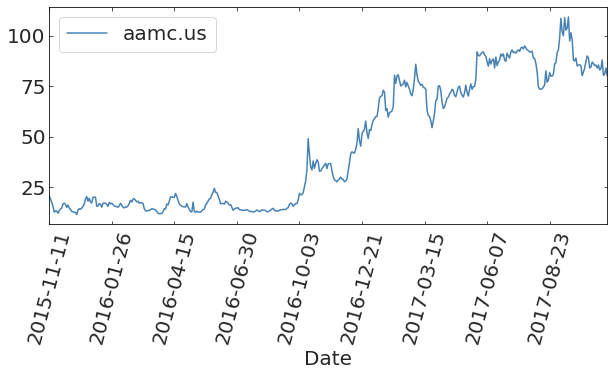

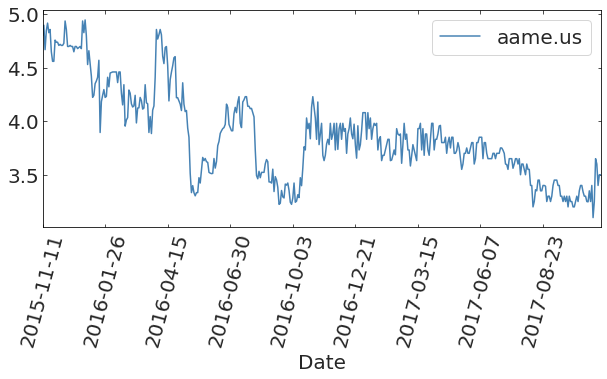

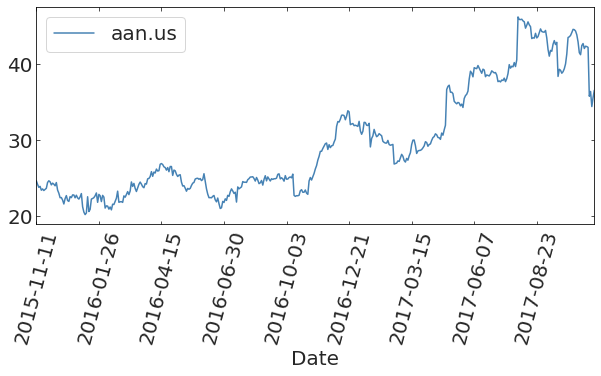

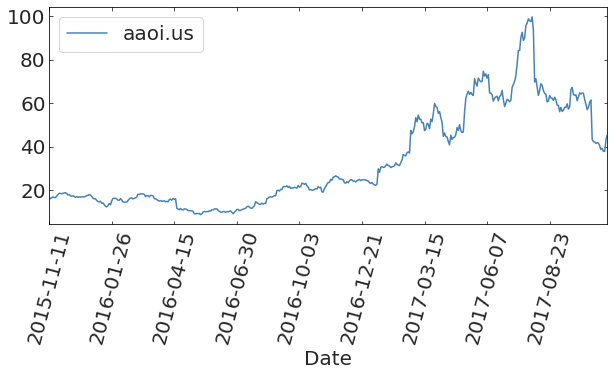

In [0]:
for c in tss.columns:
...

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

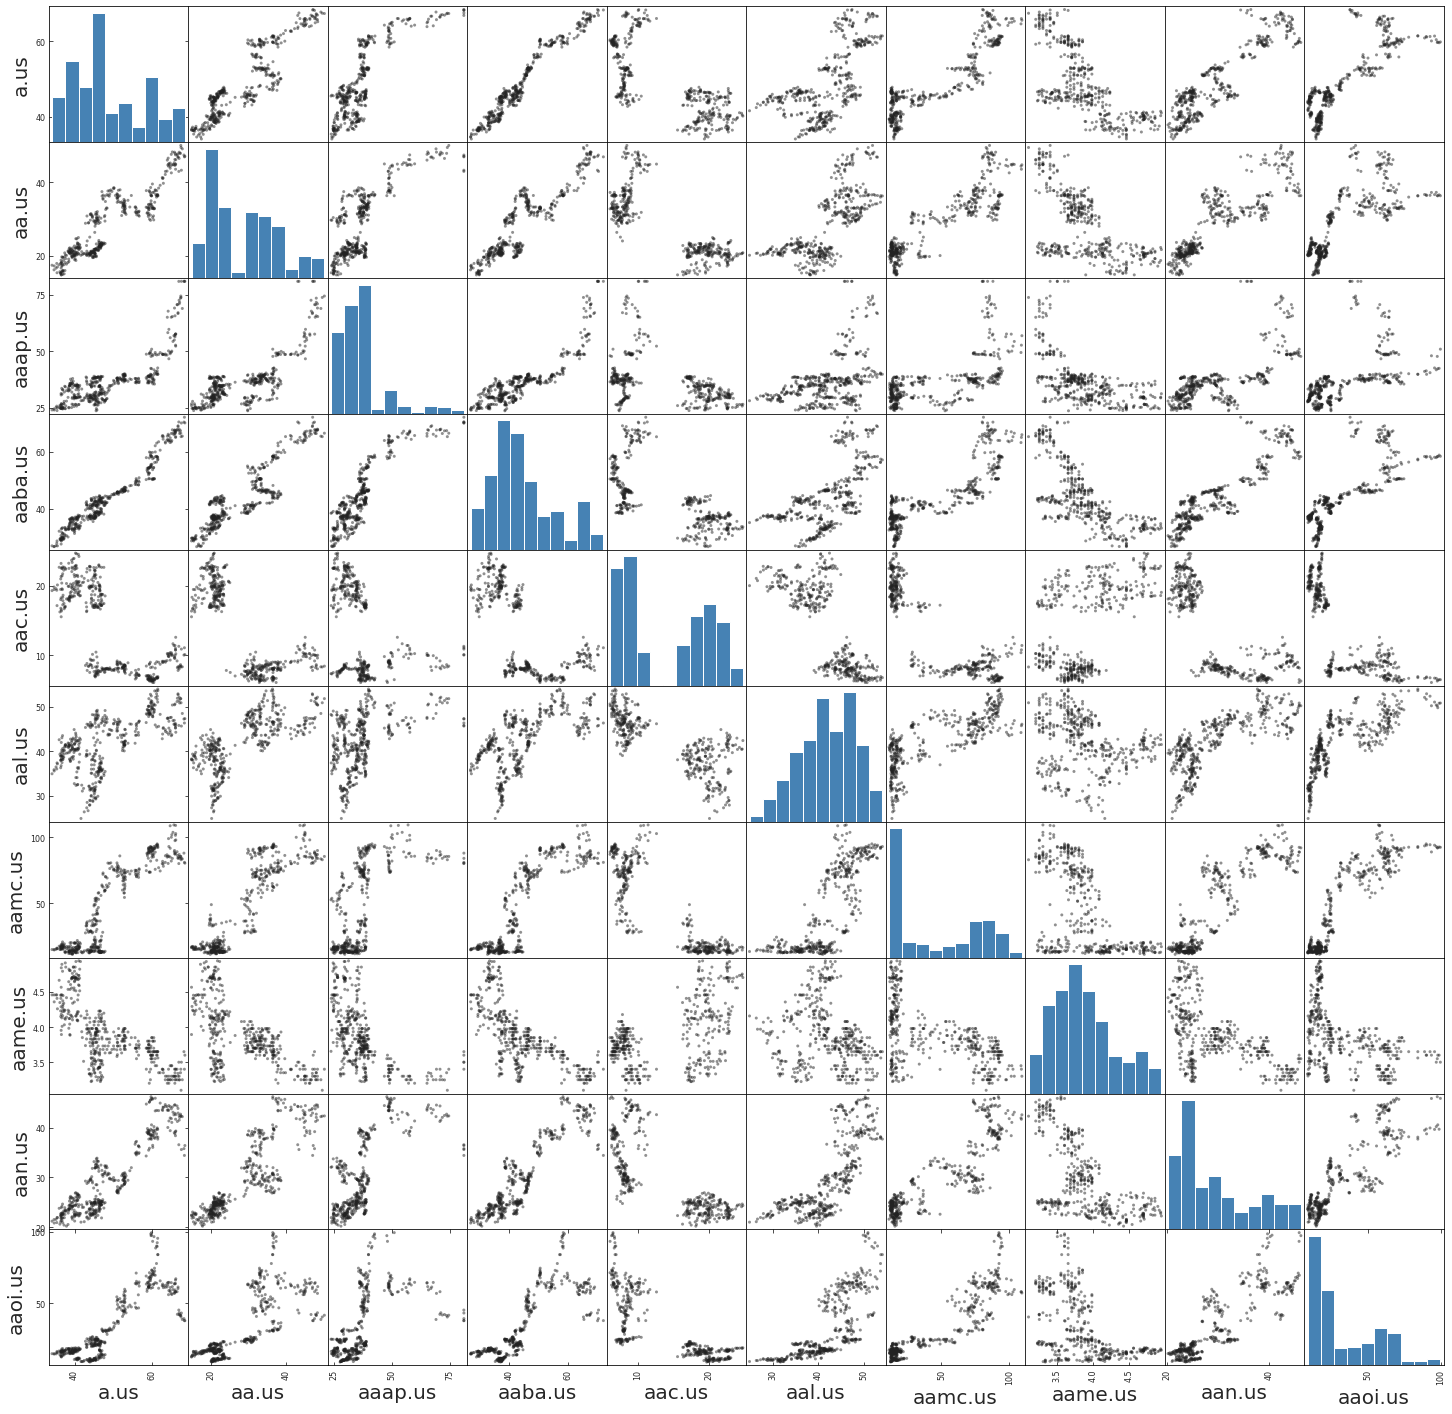

In [0]:
from pandas.plotting import scatter_matrix
...

In [0]:
...

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


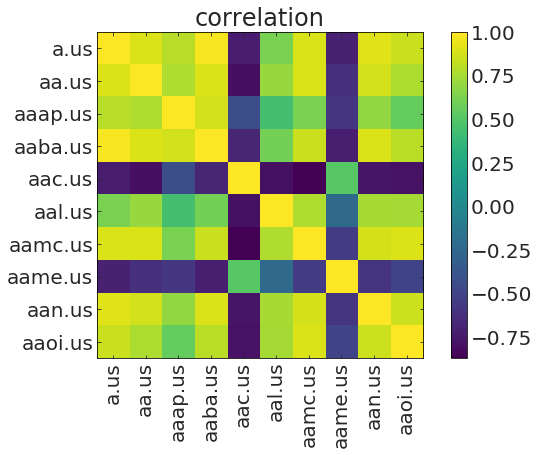

In [0]:
...

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

In [0]:
threshold = 0.05
for c in tss.columns[:2]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)
print("...")

a.us is stationary: False
aa.us is stationary: False
...


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

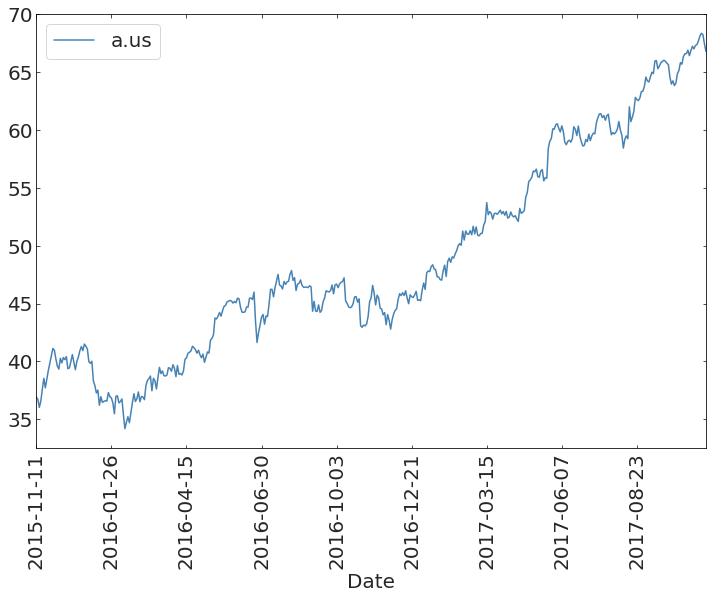

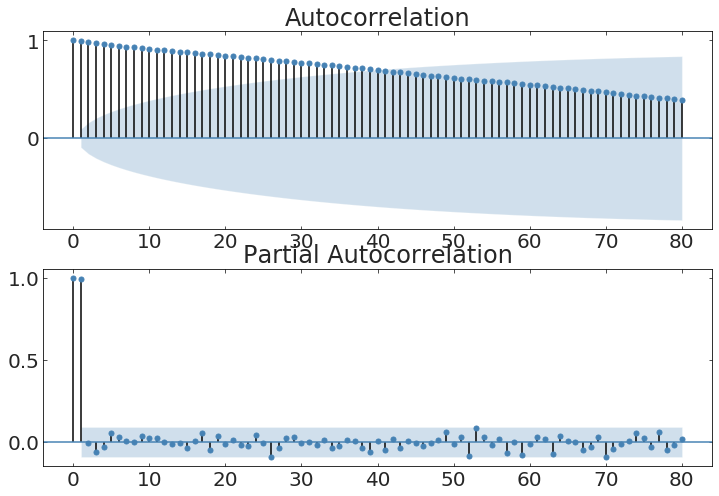

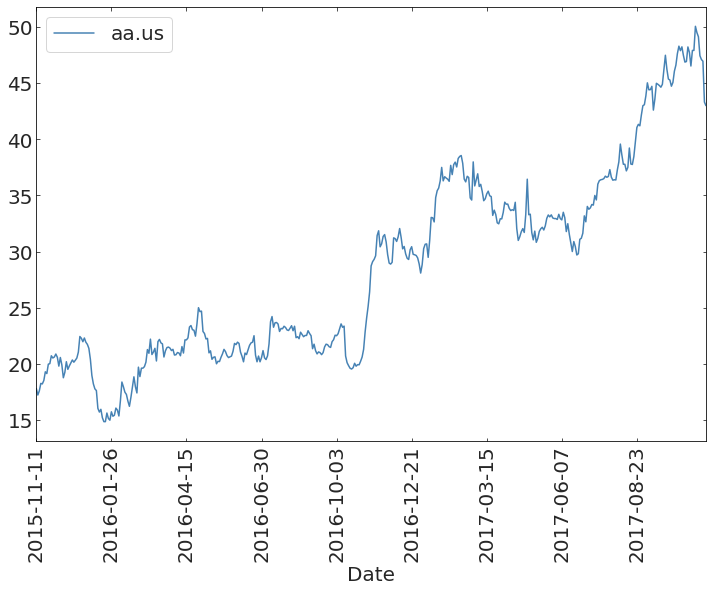

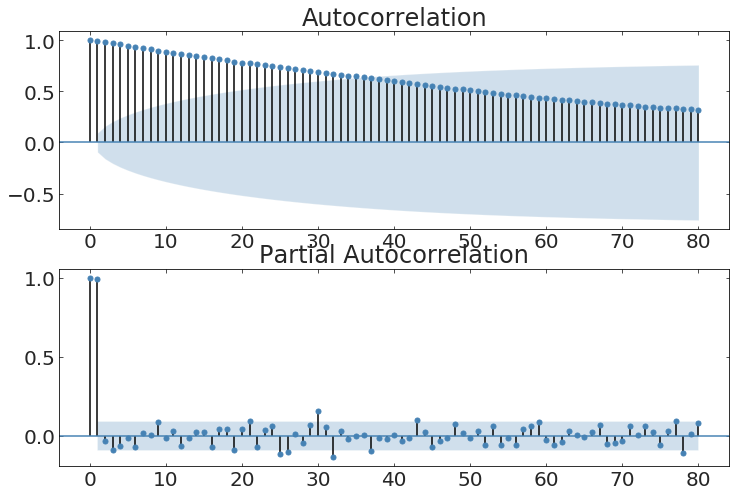

...


In [0]:
...

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC (Akaike Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
#example of model output
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 20 Feb 2020   AIC                           -594.115
Time:                        12:07:26   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
aics_st = np.zeros((5,5))
for p in range(5):
    for q in range(5):
...
print("best parameters: ", np.where(aics_st == np.nanmin(aics_st)))

## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


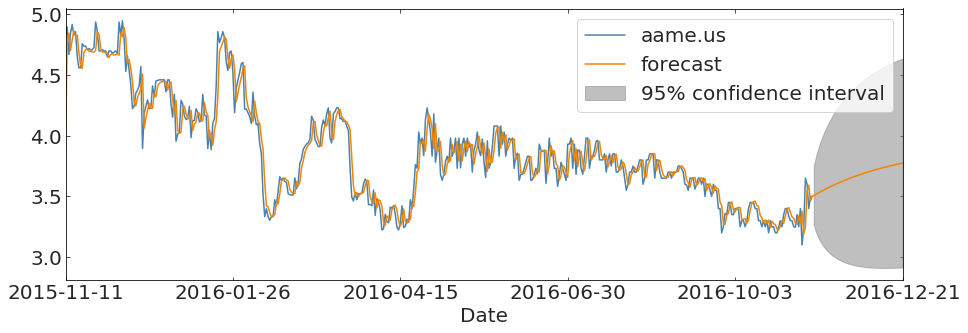

In [0]:
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# 3.5 what are the coefficients of the best fit model? what do they mean? 


#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [0]:
...

Ellipsis

In [0]:
np.where(aics[0] == np.nanmin(aics[0])), np.where(aics[1] == np.nanmin(aics[1]))

((array([2]), array([3])), (array([4]), array([3])))

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/fbb/ana

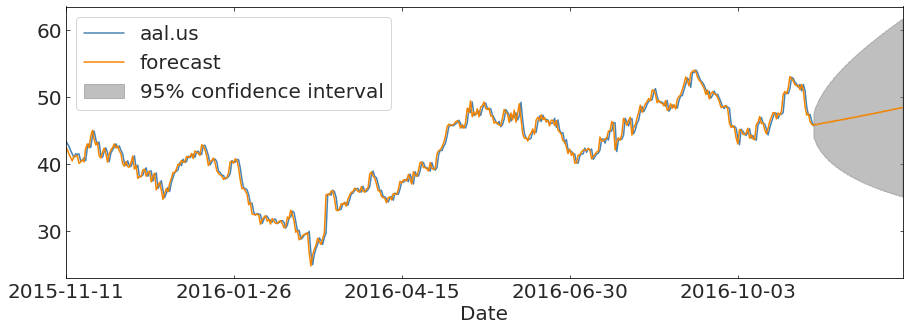

In [0]:
ax = tss[lcs[0]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[0]], (np.where(aics[0] == np.nanmin(aics[0]))[0][0], 2,  
                                 np.where(aics[0] == np.nanmin(aics[0]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  Va

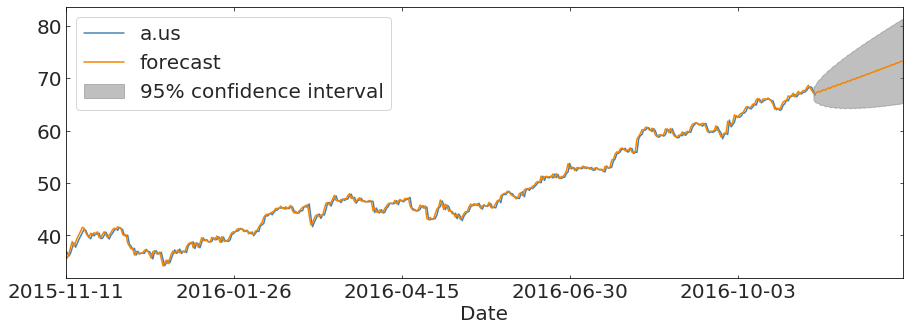

In [0]:
ax = tss[lcs[1]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[1]], (np.where(aics[1] == np.nanmin(aics[1]))[0][0], 2,  
                                 np.where(aics[1] == np.nanmin(aics[1]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?